## Notebook to recreate a tissue sample from ambient maps

In [1]:
%load_ext autoreload
%autoreload 2

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import os
# import pickle
from PIL import Image
import torch 
# setting parameters:

width_cutoff = 1640 # um
pixel_per_um = 15.3846 # from BioRxiv paper

ModuleNotFoundError: No module named 'imageio'

Script to write loom segmentation/celltype assignment data into the raw matrix:

In [3]:
# # Load osmFISH data
# import loompy
# import pickle
# import numpy as np
# from matplotlib.colors import to_rgba

# width_cutoff = 1640 # um
# pixel_per_um = 15.3846 # from BioRxiv paper


# osmfish_loom = loompy.connect("/dh-projects/ag-ishaque/analysis/tiesmeys/src/sonar/test/osmFISH/data/osmFISH_SScortex_mouse_all_cells.loom")

# osmfish_genes = list(osmfish_loom.row_attrs['Gene'])
# osmfish_clusters = osmfish_loom.col_attrs['ClusterName']
# osmfish_data = osmfish_loom[:,:].T[osmfish_clusters != "Excluded", :]
# osmfish_clusters = osmfish_clusters[osmfish_clusters != "Excluded"]
# osmfish_uniq_labels = sorted(set(osmfish_clusters) - set(['Excluded']))

# with open("polyT_seg.pkl", "rb") as f:
#     seg_dic = pickle.load(f)


# osmfish_ref_colors = {
#     "Inhibitory CP": "#9b067d",
#     "Inhibitory Crhbp": "#9805cc",
#     "Inhibitory Cnr1": "#ca4479",
#     "Inhibitory IC": "#ff49b0",
#     "Inhibitory Kcnip2": "#af7efe",
#     "Inhibitory Pthlh": "#4e14a6",
#     "Inhibitory Vip": "#7759a4",
#     "Pyramidal Cpne5": "#3e4198",
#     "Pyramidal L2-3": "#0ab4e4",
#     "Pyramidal L2-3 L5": "#1e6a87",
#     "Pyramidal Kcnip2": "#6787d6",
#     "Pyramidal L3-4": "#004dba",
#     "pyramidal L4": "#78edff",
#     "Pyramidal L5": "#0a9fb4",
#     "Pyramidal L6": "#027fd0",
#     "Hippocampus": "#004b71",
#     "Astrocyte Gfap": "#de4726",
#     "Astrocyte Mfge8": "#f69149",
#     "Oligodendrocyte Precursor cells": "#b3ee3d",
#     "Oligodendrocyte COP": "#5dd73d",
#     "Oligodendrocyte NF": "#64a44e",
#     "Oligodendrocyte MF": "#2f7449",
#     "Oligodendrocyte Mature": "#285528",
#     "Perivascular Macrophages": "#762a14",
#     "Microglia": "#a7623d",
#     "C. Plexus": "#21b183",
#     "Ependymal": "#fadf0b",
#     "Pericytes": "#f8c495",
#     "Endothelial": "#f81919",
#     "Endothelial 1": "#f05556",
#     "Vascular Smooth Muscle": "#aec470",
# }
# osmfish_colors = [osmfish_ref_colors[cl] for cl in osmfish_uniq_labels]

# seg_clusternames = list(np.unique(osmfish_loom.col_attrs["ClusterName"]))
# col_dic = dict(zip(osmfish_loom.col_attrs['CellID'], [osmfish_ref_colors.get(e, None) for e in osmfish_loom.col_attrs["ClusterName"]]))
# clid_dic = dict(zip(osmfish_loom.col_attrs['CellID'], [seg_clusternames.index(e) for e in osmfish_loom.col_attrs["ClusterName"]]))

# seg_img = np.zeros([width_cutoff,3500,4])#, ds.shape[1], 4])
# seg_img[..., 3] = 1 # background color to black
# seg_ctmap = np.zeros([width_cutoff])#, ds.shape[1]], dtype=int)

# cell_matrix_raw = np.zeros((len(osmfish_colors)+2,)+seg_img.shape[:-1])
# for cell_id, seg_coords in seg_dic.items():
#     if col_dic[cell_id] is None:
#         continue
#     seg_coords_small = (seg_coords / pixel_per_um).astype(int)
#     cell_matrix_raw[clid_dic[cell_id],seg_coords_small[:, 0], seg_coords_small[:, 1]]=1
#     seg_coords_small = (seg_coords / pixel_per_um).astype(int)
#     seg_col = to_rgba(col_dic[cell_id])
# #     seg_ctmap[seg_coords_small[:, 0], seg_coords_small[:, 1]] = clid_dic[cell_id]
# #     print(len(seg_col))
#     seg_img[seg_coords_small[:, 0], seg_coords_small[:, 1]] = seg_col

# np.save('published_cell_matrix_raw.npy',cell_matrix_raw)
# np.save('published_cell_matrix_img.npy',seg_img)


In [4]:
# This is the relative location of the kernel path with respect to the notebook location, assuming the kernel root
# is in the sonar root folder:

rel_kernel_path = 'test/osmFISH/data/'

data_dict = np.load(os.path.join(*rel_kernel_path.split('/'),'published_cell_matrix.npz'))

cell_matrix_raw = data_dict['raw']
seg_img = data_dict['img']

In [5]:


# plt.figure(figsize=[5, 10.3])
# plt.imshow(seg_img.swapaxes(0, 1))
# plt.xlim([width_cutoff, 0])
# # scalebar = ScaleBar(1, 'um', pad=0.1, font_properties={"size": 20})
# # plt.gca().add_artist(scalebar)
# plt.gca().get_xaxis().set_visible(False)
# plt.gca().get_yaxis().set_visible(False)
# # sns.despine(top=True, bottom=True, left=True, right=True)
# # pass

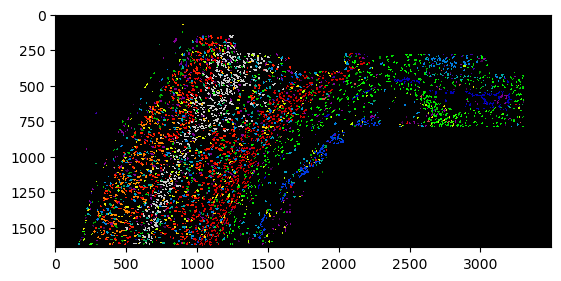

In [6]:
plt.imshow(cell_matrix_raw.argmax(0),cmap='nipy_spectral',interpolation='none')

In [7]:
from src import sonar
from time import perf_counter

# son = sonar.Sonar(max_radius=100,linear_steps=5)

# pc = perf_counter()
# co_occurrences = son.co_occurrence_from_tensor(cell_matrix_raw)
# print(perf_counter() - pc)

In [8]:
# plt.plot(co_occurrences.diagonal())

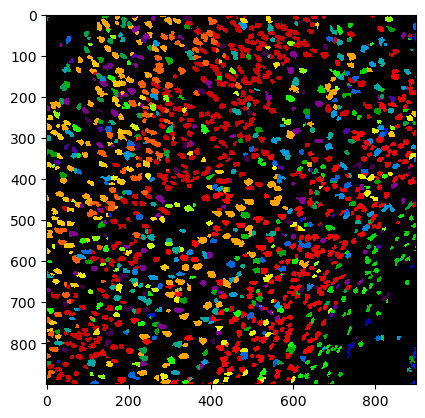

In [9]:
x_,_x = 400,1300
y_,_y = 700,1600

cm1 = cell_matrix_raw[:,x_:_x,y_:_y]

plt.imshow(cm1.argmax(0),cmap='nipy_spectral',interpolation='none',vmax=cm1.shape[0])

In [10]:

# stop
surface_areas = cm1.sum(1).sum(1)
idcs = surface_areas>2000
cm1 = cm1[idcs]


<BarContainer object of 24 artists>

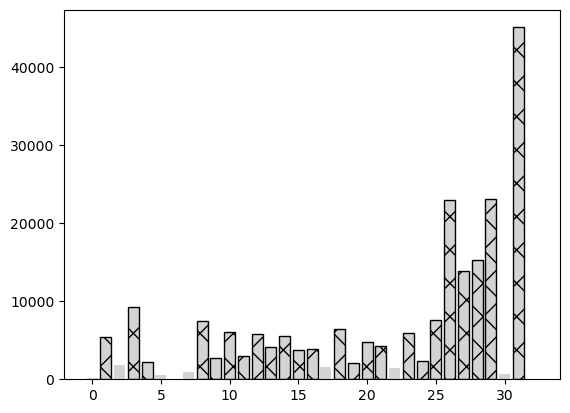

In [11]:
plt.bar(np.arange(surface_areas.shape[0]), surface_areas,color='lightgrey')
plt.bar(np.arange(surface_areas.shape[0])[idcs], surface_areas[idcs], color='r', fill=False, hatch='x')

In [12]:
# from src import sonar

# son = sonar.Sonar(um_per_px=1)
# mask = np.zeros(cm1.shape[1:])

cm_resized = cm1#son.rescale(cell_matrix.astype(np.float),0.3)

['compare_ssam_code.ipynb',
 'sonar_recreate1_new.ipynb',
 '.ipynb_checkpoints',
 'run_with_full_class_labels.ipynb',
 'sonar_tissue_analog.ipynb',
 'osmFISH_SSp.ipynb',
 '__pycache__',
 'osmFISHfinal.ipynb',
 'osmFISH_sonar_mRNA.ipynb',
 'sonar_recreate_2.ipynb',
 'data',
 'output',
 'sonar_recreate_3.ipynb',
 'compare_ssams.ipynb',
 'zenodo',
 'sonar.py']

In [14]:
import torch

if torch.cuda.is_available():
    import torch as t
    device = 'cuda:0'
else:
    import torch as t
    device='cpu'



In [15]:

# mask = son.create_tissue_mask(torch.tensor(cell_matrix_raw[idcs].sum(0)>0 ,device=device),min_cells=200,radius=100)
# asdf

cell_matrix_ecm = torch.zeros((cm_resized.shape[0]+1,)+cm_resized.shape[1:])
cell_matrix_ecm[:-1]=torch.tensor(cm_resized)
cell_matrix_ecm[-1]=~(cell_matrix_ecm.sum(0)>0)

# plt.imshow(cell_matrix_ecm[-1].cpu())

cell_matrix_ecm = cell_matrix_ecm.cpu().numpy()



In [16]:
# son = sonar.Sonar(max_radius=600,linear_steps=20)

# co_occurrences = son.co_occurrence_from_tensor(cell_matrix_raw)


In [17]:
# _=plt.plot(co_occurrences.diagonal())


In [130]:
counts = cell_matrix_ecm.sum(1).sum(1)

border=200

sample_tissue = cell_matrix_ecm.copy()


sample_tissue[:,border:-border,border:-border]=1#np.random.random((sample_tissue.shape[0],sample_tissue.shape[1]-border*2,sample_tissue.shape[1]-border*2))**0.1

# sample_tissue[:,border:-border,border:-border]*= counts [:,np.newaxis,np.newaxis]
sample_tissue[:,border:-border,border:-border]/= sample_tissue[:,border:-border,border:-border].sum(0)*2.0
sample_tissue[:,border:-border,border:-border]/=\
        sample_tissue[:,border:-border,border:-border].sum(0)

# plt.figure()
# plt.imshow(sample_tissue.argmax(0))

In [131]:
edge = cell_matrix_ecm.shape[-1]-border*2

# sample_tissue = cell_matrix_ecm.copy() 

# counts = cell_matrix_ecm[:,border:-border,border:-border].sum(-1).sum(-1)

# sample_tissue[:,border:-border,border:-border]= 0.1

sample_tissue_orig = sample_tissue.copy()

# plt.imshow(sample_tissue.argmax(0))

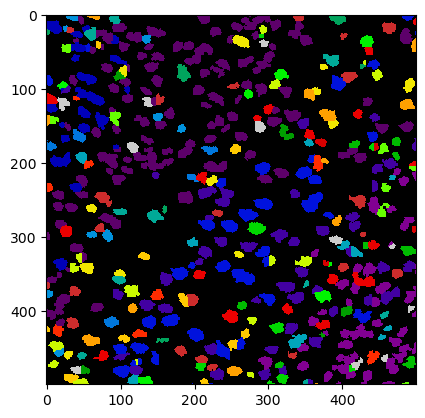

In [132]:
%matplotlib inline


plt.figure()
plt.imshow(-cell_matrix_ecm[:,border:-border,border:-border].argmax(0), cmap='nipy_spectral',interpolation='none')



In [133]:

def sig(t, k=1):
    return ((1)/(1+(torch.exp(-t*k))))

def smax(t,k=5):
    return (torch.exp(t*k)/(torch.exp(t*k).sum(0)))

rad_ = 300
lin = 1

son = sonar.Sonar(max_radius=rad_,linear_steps=lin)

cooc_template_,radii = son.co_occurrence_from_tensor(cell_matrix_ecm,interpolate=False)# tissue_mask=torch.ones(cell_matrix_ecm.shape[1:],dtype=np.bool))



In [149]:
# 0-mean, defined-std mean field approximation

import tqdm
import pdb
from torch import optim
from scipy import fft as sp_fft

kernel_inf = 0

sample_tissue = sample_tissue_orig.copy()
sample_tissue_tensor = torch.tensor(sample_tissue,device=device)

sample_tissue_tensor.requires_grad = False


span = torch.arange(sample_tissue_tensor.shape[1])+border
idcs_x,idcs_y = torch.meshgrid(span,span,)

cell_matrix = sample_tissue_orig.copy()
cell_counts = counts#torch.tensor(counts, device=device)
d_sample =  torch.zeros((sample_tissue_tensor.shape[0],)+(sample_tissue_tensor.shape[1]-2*border,)*2, device=device)
d_sample_old =  torch.zeros_like(d_sample, device=device)

sample_center_x,sample_center_y = torch.meshgrid(torch.arange(d_sample.shape[1])+border,torch.arange(d_sample.shape[2])+border)

count_tensor = torch.tensor(counts, device=device)
cooc_template_tensor = torch.tensor(cooc_template_, device=device)

kernels = son.kernels

kernel_size = kernels.shape[1:]
shape = [kernel_size[i]+sample_tissue.shape[i+1] for i in range(2)]
fshape = [sp_fft.next_fast_len(shape[a], True) for a in [0,1]]
kernels_fft = (t.fft.rfftn(kernels, fshape,dim=[1,2]))
width_kernel=kernels.shape[1]


# fig = plt.figure(figsize=(8,8))
# ax1 = plt.subplot(221)
# ax2 = plt.subplot(222)
# ax3 = plt.subplot(223)
# ax4 = plt.subplot(224)
 
# # ax1.set_title(d_sample.std())
# img1 = ax1.imshow(-cell_matrix_ecm[:,border:-border,border:-border].argmax(0),aspect='auto', interpolation='none',cmap='nipy_spectral')
# img2 = ax2.imshow(-cell_matrix_ecm[:,border+60],
#                    vmin=0, vmax=1,cmap='Greys', interpolation='none', aspect='auto') #
# img4 = ax4.imshow(-cell_matrix_ecm[:,border+60]*0,
#                    vmin=-10, vmax=10,cmap='seismic', interpolation='none', aspect='auto') #

# plt3 = ax3.plot([],[])
# plt4 = ax4.plot([],[],)
# clrs = plt.cm.nipy_spectral(np.linspace(0,1, (cell_matrix_ecm.shape[0]))[::-1])

epochs = 500

# outs = []

# fig.canvas.draw()

gif_frames = []
# sample_tissue_maxed = torch.tensor(sample_tissue,device=device)
    
for k in tqdm.tqdm(range(epochs)):
    
    k_ = k/epochs
    
    d_sample_old=d_sample.clone()
    d_sample [:] = 0    

    loss = 0

    for i in range(sample_tissue.shape[0]):
        # print(i)
        h1_fft = t.fft.rfftn(sample_tissue_tensor[i], fshape,dim=[0,1])
        h1_fftprod =  (h1_fft*kernels_fft)
        h1_conv = t.fft.irfftn(h1_fftprod,fshape,dim=[1,2])
        h1_conv_ =  h1_conv[:,width_kernel//2:width_kernel//2+sample_tissue_tensor.shape[1],
                        width_kernel//2:width_kernel//2+sample_tissue_tensor.shape[2]] #signal._signaltools._centered(h1_conv,[len(kernels)]+fshape).copy()

        h1_product=h1_conv_*sample_tissue_tensor[i]#/np.sum(kernels,axis=(1,2))[:,None,None]
        co_occurrence=h1_product.sum(dim=(1,2))

        d_cooc = cooc_template_tensor[i,i]-co_occurrence

        d_sample[i] += (h1_product*d_cooc[:,None,None])[:,border:-border,border:-border].mean(0)

        for j in range(i+1,sample_tissue.shape[0]):
            h2_product=h1_conv_*sample_tissue_tensor[j]#/np.sum(kernels,axis=(1,2))[:,None,None]
            co_occurrence = h2_product.sum(dim=(1,2))
            d_cooc = cooc_template_tensor[i,j]-co_occurrence
            d_sample[i] += (h2_product*d_cooc[:,None,None])[:,border:-border,border:-border].mean(0)
            d_sample[j] += (h2_product*d_cooc[:,None,None])[:,border:-border,border:-border].mean(0)


    d_sample_stds = d_sample.std(dim=(1,2))
    d_sample_stds[d_sample_stds<2] = 2
    d_sample/=d_sample_stds[:,None,None]

    # if d_sample.std() > 1:
    #     d_sample/=d_sample.std()/1

    d_sample = d_sample*0.2+d_sample_old*0.8

    sample_tissue_tensor[:,border:-border,border:-border] += d_sample*2

    ct_map = sample_tissue_tensor[:,border:-border,border:-border].argmax(0)

    
    sample_tissue_tensor[sample_tissue_tensor<0] = 0
    sample_tissue_tensor[sample_tissue_tensor>1] = sample_tissue_tensor[sample_tissue_tensor>1]**0.5
    # sample_tissue_tensor = sample_tissue_tensor**0.8
    # sample_tissue_tensor/=(sample_tissue_tensor.sum(0)+0.00001)[None]

    sample_tissue_tensor[:,border:-border,border:-border] *= (1-k_)

    sample_tissue_tensor[ct_map,sample_center_x,sample_center_y] += (k_)


    if not k%3:
        fig, ax = plt.subplots(figsize=(8,8))

        plt.imshow(-sample_tissue_tensor.argmax(0).cpu().numpy(),cmap='nipy_spectral',interpolation='none')

        plt.savefig(f'./test/osmFISH/output/{k:0>4d}.png')
        plt.close()


100%|███████████████████████████████████████████████████████████████| 500/500 [08:33<00:00,  1.03s/it]


In [146]:
f'./test/osmFISH/output/{k:0>4d}.png'

'./test/osmFISH/output/1999.png'

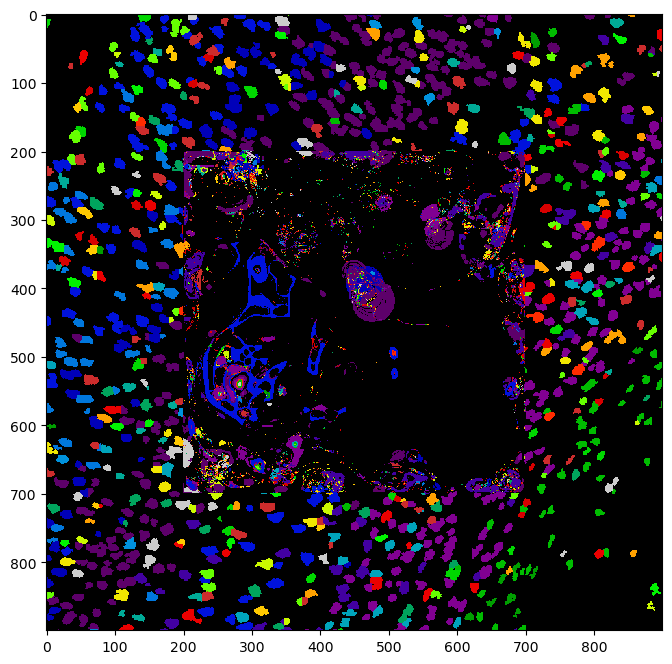

In [127]:
plt.figure(figsize=(8,8))

plt.imshow(-sample_tissue_tensor.argmax(0).cpu().numpy(),cmap='nipy_spectral',interpolation='none')

In [26]:
width_kernel

1201

NameError: name 'opt' is not defined

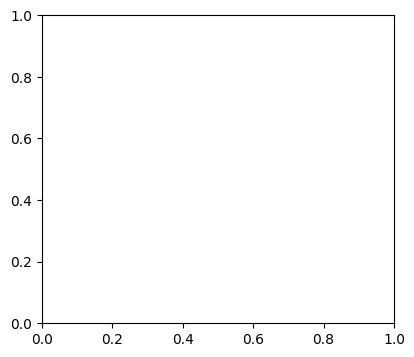

In [27]:
plt.figure(figsize=(10,4))

# opt = d_sample[:,400:-400,400:-400].clone()    

# for i in range(10):
#     opt = opt**2
#     opt/=(opt.sum(0))
#     opt = (opt.T/(opt.sum(-1).sum(-1)/(exp_counts+0.001)+0.001)).T

# plt.figure(figsize=[10,7])
plt.subplot(1,2,1)
plt.imshow(-opt.argmax(0).cpu(),cmap='nipy_spectral',)
# plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(-np.argmax(cell_matrix_ecm[:,:],0),cmap='nipy_spectral')

In [ ]:
plt.figure()
plt.plot(cell_matrix_ecm[:,:100,:100].sum(1).sum(1))
plt.plot(cell_matrix_ecm[:,-200:,-200:].sum(1).sum(1))

<IPython.core.display.Javascript object>


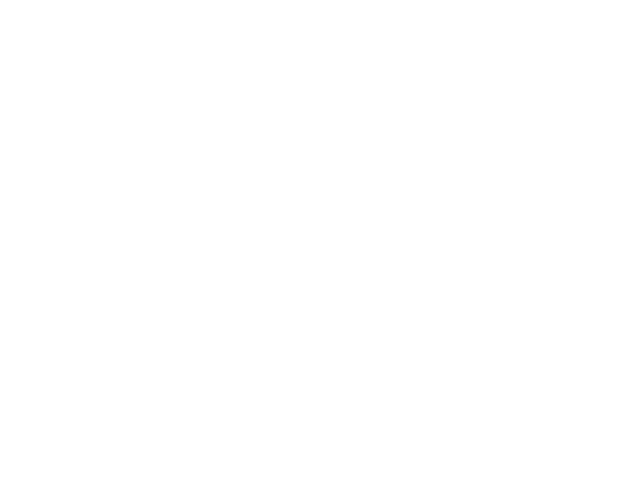

In [ ]:
edge_size=500

sample_tissue = np.random.random([son.distance_maps.shape[0],1700,1700])**0.05

# sample_tissue[4,:600,:600]+=0.5
# sample_tissue[7,-600:,-600:]+=0.5
# sample_tissue[-1,:600,:600]+=0.5
# sample_tissue[-1,-600:,-600:]+=0.5
# sample_tissue[:,edge_size:-edge_size,edge_size:-edge_size]=0.1

# sample_tissue+=np.random.random(sample_tissue.shape)*0.3

sample_tissue*= counts[:,np.newaxis,np.newaxis]
sample_tissue/= sample_tissue.sum(0)
# sample_tissue[:,edge_size:-edge_size,edge_size:-edge_size]/=\
#         sample_tissue[:,edge_size:-edge_size,edge_size:-edge_size].sum(0)

plt.figure()
plt.imshow(-sample_tissue.argmax(0), cmap='nipy_spectral')

In [ ]:

import tqdm
img_shape = sample_tissue[0].shape

current_mask = torch.zeros(img_shape, device=device) 

mask_ffts = []
mask_sums = []

mask_shape = son.kernels[0].shape
padded_shape = [mask_shape[i]+img_shape[i] for i in range(2)]
slide = mask_shape[0]//2
current_mask = torch.zeros(padded_shape) 

for m,mask_ in tqdm.tqdm_notebook(enumerate(son.kernels)):
    
    current_mask*=0
    current_mask[:mask_shape[0],:mask_shape[1]] = torch.tensor(mask_.astype(np.float), device=device)
#     current_mask = torch.roll(current_mask,(-500,-500),dims=[0,1])
    current_mask_fft = torch.rfft(current_mask,2)
    mask_ffts.append(current_mask_fft)
    mask_sums.append((current_mask.sum()))


<IPython.core.display.Javascript object>


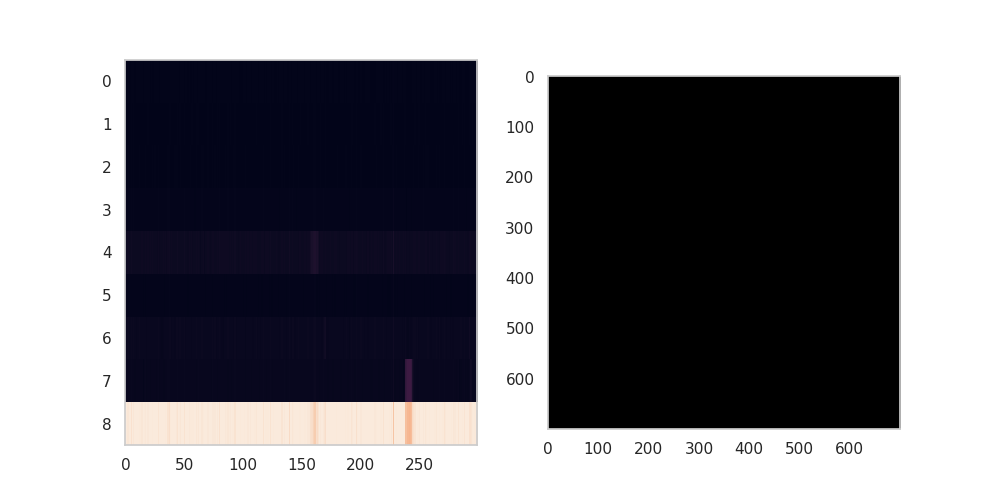

/home/tiesmeys/anaconda3/envs/ssam/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [ ]:
%matplotlib notebook

import tqdm


cell_counts = torch.tensor(cell_matrix_ecm.mean(-1).mean(-1), device=device)
d_sample =  torch.zeros(sample_tissue.shape, device=device)
mask_shape = son.kernels[0].shape
padded_shape = [mask_shape[i]+img_shape[i] for i in range(2)]
slide = mask_shape[0]//2
current_mask = torch.zeros(padded_shape) 
current_sample = torch.zeros(padded_shape)
count_tensor = torch.tensor(counts, device=device)
corrs_tensor = torch.tensor(corrs, device=device)

sample_tissue_tensor = torch.tensor(sample_tissue, device=device)


    
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
    
img1 = ax1.imshow(sample_tissue_tensor[:,500:800,600].cpu(),aspect='auto')
img2 = ax2.imshow(-sample_tissue_tensor[:,edge_size:-edge_size,edge_size:-edge_size].argmax(0).cpu(),cmap='nipy_spectral')

fig.canvas.draw()

for k in tqdm.tqdm_notebook(range(8)):
    d_sample *= 0

    stack_ffts = []

    for s in range(len(sample_tissue)):
        current_sample[:img_shape[0],:img_shape[1]] = torch.tensor(sample_tissue_tensor[s], 
                                                                   dtype=torch.float, device=device)
        stack_ffts.append(torch.rfft(current_sample,2))
        
    for m,mask in (enumerate(mask_ffts)):
        current_mask_fft = mask
        mask_sum = int(mask_sums[m])
    
        for s in range(len(sample_tissue)):
            prod_gpu = _torch_complex_product(current_mask_fft, stack_ffts[s])
            inv_gpu = torch.irfft(prod_gpu,signal_ndim=2) 
            sample = torch.abs(inv_gpu[slide:img_shape[0]+slide,
                                slide:img_shape[1]+slide]).squeeze()

            for i in range(son.distance_maps.shape[0]):
                d_sample[i]+=sample*corrs_tensor[i][s][-1-m]/((mask_sum)**1.0)
   

    d_sample/=d_sample.sum(0)
    opt = d_sample[:,edge_size:-edge_size,edge_size:-edge_size].clone()#*0.1*sample_tissue_tensor[:,300:-300,300:-300]*0.9    
        
    
    exp_counts=(cell_counts/cell_counts.sum()*opt.shape[1]*opt.shape[2])

    for i in range(40):
        opt = (opt.T/(opt.sum(-1).sum(-1)/(exp_counts**1.1+0.00)+0.00)).T
        opt = opt**1.5
        opt = (opt.T/(opt.sum(-1).sum(-1)/(exp_counts**1.1+0.00)+0.00)).T
        opt/=opt.sum(0)
        
    opt = (opt.T/(opt.sum(-1).sum(-1)/(exp_counts+0.000)+0.000)).T

        
    sample_tissue_tensor[:,edge_size:-edge_size,edge_size:-edge_size]=\
                         sample_tissue_tensor[:,edge_size:-edge_size,edge_size:-edge_size]*0.99+opt*0.01

    
    sample_tissue_tensor[:,edge_size:-edge_size,edge_size:-edge_size]/=\
                            sample_tissue_tensor[:,edge_size:-edge_size,edge_size:-edge_size].sum(0)

    img1.set_data(sample_tissue_tensor[:,500:800,600].cpu())
    img2.set_data(-sample_tissue_tensor[:,edge_size:-edge_size,edge_size:-edge_size].argmax(0).cpu())
    fig.canvas.draw()
    

<IPython.core.display.Javascript object>


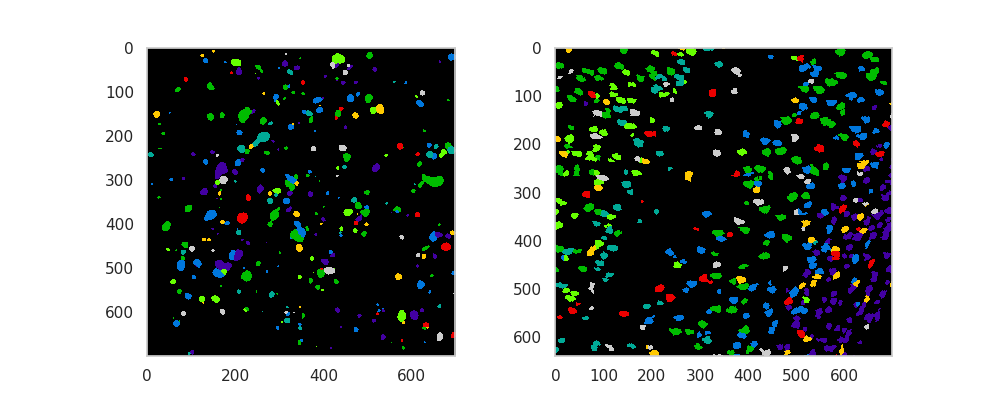

In [ ]:
plt.figure(figsize=(10,4))

# opt = d_sample[:,400:-400,400:-400].clone()    

# for i in range(10):
#     opt = opt**2
#     opt/=(opt.sum(0))
#     opt = (opt.T/(opt.sum(-1).sum(-1)/(exp_counts+0.001)+0.001)).T

# plt.figure(figsize=[10,7])
plt.subplot(1,2,1)
plt.imshow(-opt.argmax(0).cpu()[:700,:700],cmap='nipy_spectral',)
# plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(-np.argmax(cell_matrix_ecm[:,:],0),cmap='nipy_spectral')

In [ ]:
img_sample = np.argmax(cell_matrix_ecm,0)
# img_sample[cell_matrix_ecm.sum(0)==0]=np.nan

plt.imshow(img_sample, cmap='gist_ncar')
plt.colorbar()

In [ ]:

plt.figure(figsize=(8,8))
img = np.zeros((700,700,3))
img[:,:,0] =sample_tissue_tensor[5,400:-400,400:-400].cpu()
img[:,:,1] =sample_tissue_tensor[6,400:-400,400:-400].cpu()
plt.imshow(img,aspect='auto')

In [ ]:
plt.figure()
plt.imshow(opt.cpu()[-1])